What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

Answer:

Ensemble techniques combine multiple models to improve predictive performance and robustness.

Bagging (Bootstrap Aggregating) builds several independent models (often of the same type), each trained on a random sample of the data, then averages or votes their predictions. It decreases variance and helps reduce overfitting.

Boosting builds models sequentially, with each new model focusing on correcting errors made by the previous ones. It decreases bias and can improve prediction accuracy, but may risk overfitting if not controlled.

Question 2:
Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

Answer:

Random Forest reduces overfitting by creating an ensemble of decision trees, each trained on a random subset of the data and features.

The averaging (for regression) or majority vote (for classification) process helps generalize better and reduces variance.

Two key hyperparameters:

n_estimators: Number of trees; more trees provide a better averaging effect.

max_features: Controls the randomness in feature selection for each split, increasing diversity among trees and reducing overfitting.

Question 3:
What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Answer:

Stacking combines multiple base models (often of different types) and uses another model (meta-learner) to aggregate their predictions.

Unlike bagging or boosting, stacking uses level-wise learning — base models make predictions that become inputs for the meta-learner.

Example use case: Predicting loan default using Decision Tree, SVM, and KNN as base models, and Logistic Regression to aggregate their predictions.

Question 4:
What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

Answer:

OOB (Out-of-Bag) Score is an internal validation score in Random Forest using the data points left out of a tree’s bootstrap sample.

Useful because it estimates model performance during training, without needing a separate validation set.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Answer:

AdaBoost focuses on correcting mistakes by increasing the weight of misclassified samples, making them more important for the next model. Gradient Boosting creates new models that try to fix the errors from the previous prediction directly. AdaBoost is best for simple problems, while Gradient Boosting works better for complex data and tasks.

Question 6:
Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

Answer:

CatBoost uses advanced encoding techniques, such as ordered target statistics, to transform categorical features efficiently.

It avoids target leakage and the need for manual encoding (one-hot or label), making it robust for tasks with many categorical variables.



Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization?

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Without scaling:", classification_report(y_test, knn.predict(X_test)))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
print("With scaling:", classification_report(y_test, knn_scaled.predict(X_test_scaled)))

params = {'n_neighbors': list(range(1, 21)), 'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy', cv=5)
gs.fit(X_train_scaled, y_train)
print("Best parameters:", gs.best_params_)

best_knn = KNeighborsClassifier(**gs.best_params_)
best_knn.fit(X_train_scaled, y_train)
print("Best KNN:", classification_report(y_test, best_knn.predict(X_test_scaled)))


Without scaling:               precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       0.82      0.67      0.74        21
           2       0.69      0.60      0.64        15

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.75        54
weighted avg       0.76      0.76      0.75        54

With scaling:               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.81      0.89        21
           2       0.88      1.00      0.94        15

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.92        54

Best parameters: {'metric': 'manhattan', 'n_neighbors': 13}
Best KNN:               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00     

Question 8 : PCA + KNN with Variance Analysis and Visualization?

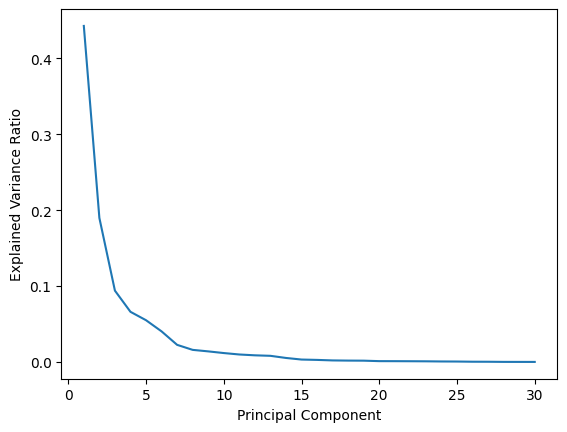

Accuracy (original): 0.9122807017543859
Accuracy (PCA): 0.49122807017543857


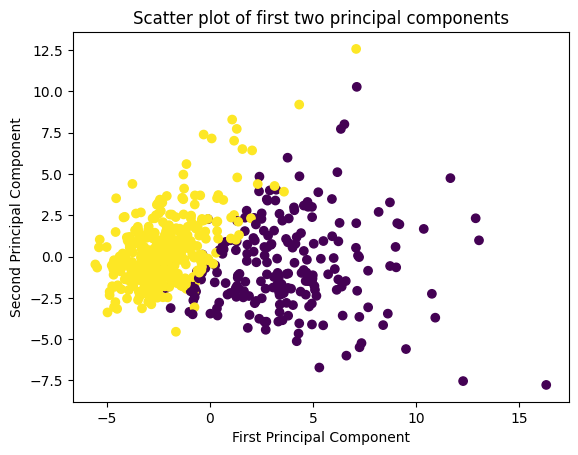

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)

X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3)

knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train, y_train)
acc_orig = accuracy_score(y_test, knn_orig.predict(X_test))

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("Accuracy (original):", acc_orig)
print("Accuracy (PCA):", acc_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter plot of first two principal components')
plt.show()


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis?

K=1, Metric=euclidean, MSE=0.00
K=1, Metric=manhattan, MSE=0.00
K=5, Metric=euclidean, MSE=5247.42
K=5, Metric=manhattan, MSE=6325.24
K=10, Metric=euclidean, MSE=7128.52
K=10, Metric=manhattan, MSE=8054.89
K=20, Metric=euclidean, MSE=9303.92
K=20, Metric=manhattan, MSE=10158.59
K=50, Metric=euclidean, MSE=12524.17
K=50, Metric=manhattan, MSE=13637.89


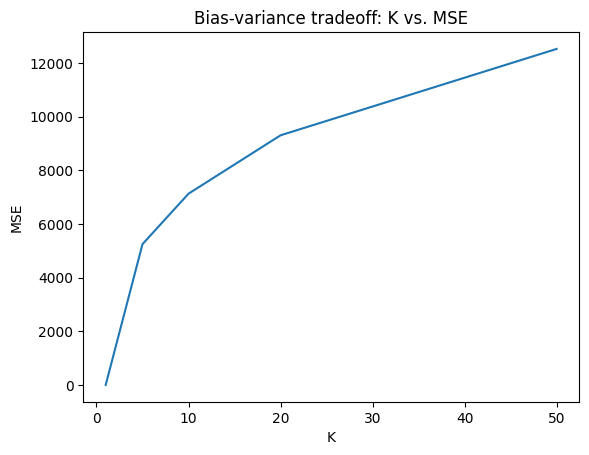

In [4]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10)
results = {}
for K in [1,5,10,20,50]:
    for metric in ['euclidean', 'manhattan']:
        knn_reg = KNeighborsRegressor(n_neighbors=K, metric=metric)
        knn_reg.fit(X, y)
        y_pred = knn_reg.predict(X)
        mse = mean_squared_error(y, y_pred)
        results[(K, metric)] = mse

for (K, metric), mse in results.items():
    print(f"K={K}, Metric={metric}, MSE={mse:.2f}")

plt.plot([K for K, m in results if m == 'euclidean'],
         [results[(K, 'euclidean')] for K in [1,5,10,20,50]])
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Bias-variance tradeoff: K vs. MSE')
plt.show()


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data?

In [14]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import time

df = pd.read_csv("/content/diabetes.csv")
imputer = KNNImputer()
X_imputed = imputer.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3)

start = time.time()
clf_brute = KNeighborsClassifier(algorithm='brute')
clf_brute.fit(X_train, y_train)
brute_time = time.time() - start
brute_acc = clf_brute.score(X_test, y_test)

start = time.time()
clf_kd = KNeighborsClassifier(algorithm='kd_tree')
clf_kd.fit(X_train, y_train)
kd_time = time.time() - start
kd_acc = clf_kd.score(X_test, y_test)

start = time.time()
clf_ball = KNeighborsClassifier(algorithm='ball_tree')
clf_ball.fit(X_train, y_train)
ball_time = time.time() - start
ball_acc = clf_ball.score(X_test, y_test)

print(f"Brute: {brute_acc}, time: {brute_time:.2f}s")
print(f"KD-Tree: {kd_acc}, time: {kd_time:.2f}s")
print(f"Ball Tree: {ball_acc}, time: {ball_time:.2f}s")


Brute: 0.7402597402597403, time: 0.00s
KD-Tree: 0.7402597402597403, time: 0.00s
Ball Tree: 0.7402597402597403, time: 0.00s
